In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.sparse import csr_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy as sp
# from scipy.sparse.linalg import svds
import warnings
from math import ceil
warnings.filterwarnings('ignore')
import re

Analyze Data

In [2]:
def plot_data(data, column_name):
    rating_data = Counter(data[column_name])
    plt.xlabel(column_name)
    plt.ylabel('Count')
    sns.countplot(data = data, x = column_name)

In [3]:
def plot_top_k_genre(data, k=10):
    plt.ylabel('Genre')
    plt.xlabel('Count')
    sns.barplot(data = data[:k], y = 'Genre', x='Count')

In [4]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', 'hack ', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
#     text = re.sub('[^0-9a-zA-Z]+', ' ', text)
#     text = re.sub('\s+', ' ', text)
    return text

In [5]:
anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')

In [6]:
anime_df = anime_df[anime_df['name']!='◯']
anime_df['name'] = anime_df['name'].apply(text_cleaning)

In [7]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [8]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [10]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12293 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12293 non-null  int64  
 1   name      12293 non-null  object 
 2   genre     12231 non-null  object 
 3   type      12268 non-null  object 
 4   episodes  12293 non-null  object 
 5   rating    12063 non-null  float64
 6   members   12293 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 768.3+ KB


In [11]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [12]:
anime_df.describe()

,anime_id,rating,members
count,12293.000000,12063.000000,1.229300e+04
mean,14056.787603,6.474089,1.807277e+04
std,11454.657025,1.026584,5.482268e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.000000,5.880000,2.250000e+02
50%,10260.000000,6.570000,1.551000e+03
75%,24793.000000,7.180000,9.439000e+03
max,34527.000000,10.000000,1.013917e+06


In [13]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


Prepare Data

In [14]:
# Dropping anime with no rating.
# Might aswell use feature engineering technique and fill the rating instead of dropping
anime_df.drop(list(anime_df.loc[anime_df["rating"].isna()].index), axis = 0, inplace=True)

In [15]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12063 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12063 non-null  int64  
 1   name      12063 non-null  object 
 2   genre     12016 non-null  object 
 3   type      12063 non-null  object 
 4   episodes  12063 non-null  object 
 5   rating    12063 non-null  float64
 6   members   12063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 753.9+ KB


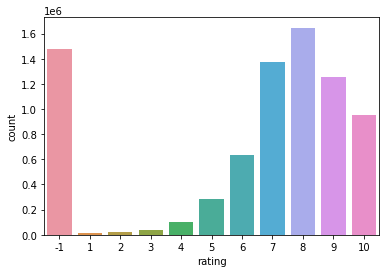

In [16]:
plot_data(rating_df, 'rating')

In [17]:
print(rating_df.shape)

(7813737, 3)


In [18]:
# Removing -1 as it indicates the user didn't rate it.
rating_df = rating_df[rating_df['rating'] != -1]

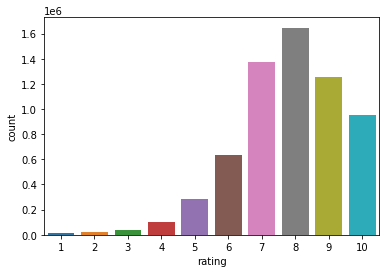

In [19]:
plot_data(rating_df, 'rating')

In [23]:
print(rating_df.shape)

(6337241, 3)


In [24]:
anime_df = anime_df.fillna('Unknown')

In [25]:
anime_ongoing_df = anime_df[anime_df['episodes']=='Unknown']
anime_finished_df = anime_df[anime_df['episodes']!='Unknown']
anime_finished_df['episodes'] = anime_finished_df['episodes'].astype('int')

In [26]:
print(anime_finished_df.shape, anime_ongoing_df.shape)

(11875, 7) (188, 7)


In [27]:
Counter(anime_finished_df['type'])

Counter({'Movie': 2296,
         'TV': 3570,
         'OVA': 3247,
         'Special': 1666,
         'Music': 487,
         'ONA': 609})

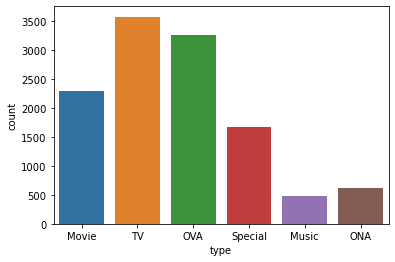

In [28]:
plot_data(anime_finished_df, 'type')

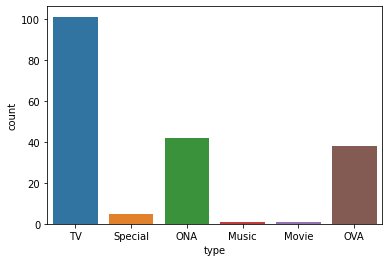

In [29]:
plot_data(anime_ongoing_df, 'type')

In [30]:
all_genres = []
for index, row in anime_finished_df.iterrows():
    all_genres += row['genre'].split(', ')
for index, row in anime_ongoing_df.iterrows():
    all_genres += row['genre'].split(', ')
genre_data = Counter(all_genres).most_common()
genre_df = pd.DataFrame(genre_data, columns=['Genre', 'Count'])

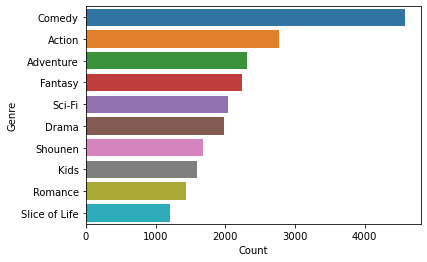

In [31]:
plot_top_k_genre(genre_df)

In [32]:
# sns.regplot(x = 'members', y = 'rating', data = anime_finished_df)

In [33]:
# sns.regplot(x = 'members', y = 'rating', data = anime_ongoing_df)

Data Preparation

In [34]:
final_df = pd.merge(rating_df,anime_df[["anime_id","name"]], left_on = "anime_id", right_on = "anime_id").drop("anime_id", axis = 1)

In [35]:
final_df.head()

,user_id,rating,name
0,1,10,Highschool of the Dead
1,3,6,Highschool of the Dead
2,5,2,Highschool of the Dead
3,12,6,Highschool of the Dead
4,14,6,Highschool of the Dead


In [36]:
# Filtering the anime data of user rating which have atleast 1000 ratings to avoid false positives.
valid_anime_data = [name for name,value in Counter(final_df['name']).most_common() if value > 1000]
# valid_user_data = [name for name, value in Counter(final_df['user_id']).most_common() if value > 3]

In [37]:
final_df = final_df[final_df['name'].isin(valid_anime_data)]
# final_df = final_df[final_df['name'].isin(valid_user_data)]
df = final_df.pivot_table(index='user_id',columns='name',values='rating')

In [38]:
df

name,07-Ghost,11eyes,11eyes: Momoiro Genmutan,91 Days,A Kite,A-Channel,Aa! Megami-sama!,Aa! Megami-sama! (TV),Aa! Megami-sama! Movie,Aa! Megami-sama!: Sorezore no Tsubasa,...,ef: A Tale of Memories.,hack Roots,hack Sign,hack Tasogare no Udewa Densetsu,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
final_df.head()

,user_id,rating,name
0,1,10,Highschool of the Dead
1,3,6,Highschool of the Dead
2,5,2,Highschool of the Dead
3,12,6,Highschool of the Dead
4,14,6,Highschool of the Dead


In [37]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### Method-1 - Popularity Based recommendations
Recommends most popular animes based on 'ratings' and 'members'.

In [38]:
def get_popularity_based_recommendations(k=10):
    recommendations = anime_df[['name','rating','members']]
    recommendations.sort_values(by=['members','rating'], inplace=True, ascending=[False, False])
    recommendations.rename(columns = {'name':'Anime name'}, inplace = True)
    recommendations.reset_index(inplace=True, drop=True)
    return recommendations[:k]

In [39]:
get_popularity_based_recommendations()

,Anime name,rating,members
0,Death Note,8.71,1013917
1,Shingeki no Kyojin,8.54,896229
2,Sword Art Online,7.83,893100
3,Fullmetal Alchemist: Brotherhood,9.26,793665
4,Angel Beats!,8.39,717796
5,Code Geass: Hangyaku no Lelouch,8.83,715151
6,Naruto,7.81,683297
7,Steins;Gate,9.17,673572
8,Mirai Nikki (TV),8.07,657190
9,Toradora!,8.45,633817


### Method-2 - Using one hot encoding of genre and applying jacob score for similarity score

Finding all the *genres*:
1. genre_mapping_data - List of names of all genres
2. length - Number of genres

In [40]:
genre_mapping_data = dict(zip(list(genre_df['Genre']), list(genre_df.index)))
length = len(genre_mapping_data)

In [41]:
# function to get the one hot encoding of genres for each entries in the anime dataframe
def get_genre_mapping(row_data):
    map_data = np.zeros(length)
    genre_values = row_data['genre'].split(', ')
    indices = [genre_mapping_data[genre] for genre in genre_values]
    map_data[indices] += 1
    return list(map_data)

In [42]:
anime_df['genre_data'] = anime_df.apply(lambda row: get_genre_mapping(row),axis=1)

Jaccard score - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html

In [43]:
# 'number' - no. of recommendations
def get_genre_based_recommendations(anime_watched, number=5):
    if anime_watched == []:
        return get_popularity_based_recommendations(k)
    results = {}
    for anime in anime_watched:
        genre_map_data = anime_df[anime_df['name'] == anime]['genre_data'].values[0]
        # search_data - List of animes not watched by the user
        search_data = anime_df[anime_df['name'] != anime]
        # calculating and storing jaccard_score of all the genres of all animes not watched by user anime watched in
        # 'similarity' column
        search_data['similarity'] = search_data['genre_data'].apply(lambda data: jaccard_score(genre_map_data, data))
        # sorting the list of unwatched animes based on jaccard score in descending order
        data = search_data.sort_values('similarity', ascending=False)[['name', 'similarity']][:number]
        # storing the recommendations in 'results'
        for _, row in data.iterrows():
            name, value = row['name'], row['similarity']
            results[name] = results.get(name, 0) + value
    results = dict(sorted(results.items(), key=lambda item: -item[1]))
    for anime_name in anime_watched:
        if anime_name in results:
            results.pop(anime_name)
    results_df = pd.DataFrame.from_dict(results, orient='index')
    results_df = results_df.reset_index()
    results_df.columns = ['name', 'similarity']
    results_df = results_df.merge(anime_df[['rating', 'name']])
    results_df.sort_values(by=['similarity', 'rating'], inplace=True, ascending=[False, False])
    return results_df[:number]

In [44]:
get_genre_based_recommendations(['Steins;Gate', 'Fullmetal Alchemist: Brotherhood', 'Shingeki no Kyojin'])

,name,similarity,rating
1,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,1.0,8.61
0,Steins;Gate: Oukoubakko no Poriomania,1.0,8.46
2,Steins;Gate: Kyoukaimenjou no Missing Link - D...,1.0,8.34
4,Shingeki no Kyojin OVA,1.0,7.88
3,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,1.0,7.75


### Method-3 Using pearson correlation on rating of an anime with respect to all other anime

In [45]:
def get_correlation_recommendations(anime_names, k=10):
    if anime_names == []:
        return get_popularity_based_recommendations(k)
    temp_df = pd.DataFrame()
    # df in this case is the rating matrix where the user data is row based, while anime data is column based.
    for name in anime_names:
        # calculating correlation value between anime watched and all other animes
        recommended_data = pd.DataFrame(df.corrwith(df[name]) ,columns=['Correlation'])
        recommended_data.sort_values(by = 'Correlation', ascending = False, inplace=True)
        temp_df = pd.concat([temp_df, recommended_data.iloc[:k]])
    # sorting recommendations based on correlation score
    temp_df.sort_values(by=['Correlation'], ascending = False, inplace=True)
    temp_df.drop(anime_names, inplace=True)
    temp_df = temp_df.reset_index()
    temp_df.columns = ['name', 'Correlation']
    temp_df = temp_df.merge(anime_df[['rating', 'name']])
    temp_df.sort_values(by=['Correlation', 'rating'], inplace=True, ascending=[False, False])
    return temp_df.iloc[:k]

In [46]:
get_correlation_recommendations(['Cowboy Bebop', 'Death Note'])

,name,Correlation,rating
0,Cowboy Bebop: Tengoku no Tobira,0.538023,8.40
1,Death Note Rewrite,0.485444,7.84
2,Samurai Champloo,0.380388,8.50
3,Michiko to Hatchin,0.365535,7.90
4,Code Geass: Hangyaku no Lelouch R2,0.358927,8.98
5,Code Geass: Hangyaku no Lelouch,0.351290,8.83
6,Shingeki no Kyojin,0.346770,8.54
7,Major S4,0.344806,8.35
8,Major S3,0.336376,8.40
9,Ghost in the Shell,0.332230,8.34


### Method-4 Collabarative filtering using cosine similarity, based on items (anime in this case)
Cosine Similarity - https://www.geeksforgeeks.org/cosine-similarity/

In [47]:
# Normalizing the rating data
collab_df = df.copy()
collab_df_norm = collab_df.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

In [48]:
collab_df_norm.fillna(0, inplace=True)
collab_df_norm = collab_df_norm.T

In [49]:
# Removing data of users who didn't rate single anime.
# This case occures because previously we removed anime data which didn't have sufficient number of rating. Now there might be users
# who rated such anime hence they will be having 0 in all animes hencee removing redundant data and converting to sparse matrix. 
collab_df_norm = collab_df_norm.loc[:, (collab_df_norm != 0).any(axis=0)]
collab_sparse = sp.sparse.csr_matrix(collab_df_norm.values)

In [50]:
# calculating cosine simiarity between all pairs of collab_sparse
item_similarity = cosine_similarity(collab_sparse)

In [51]:
# item_sim_df is having cosine similarity score of every anime compared against every other anime
item_sim_df = pd.DataFrame(item_similarity, index = collab_df_norm.index, columns = collab_df_norm.index)

In [52]:
def get_collabarative_item_based_recommendations(anime_names, k = 10):
    if anime_names == []:
        return get_popularity_based_recommendations(k)
    final_result = pd.DataFrame()
    # Extracting cosine similarity scores for all the watched animes against every other anime and storing in 'final_result'
    for anime_name in anime_names:
        temp_df = pd.DataFrame(item_sim_df.loc[anime_name].sort_values(ascending=False))
        temp_df.columns=['correlation']
        final_result = pd.concat([final_result, temp_df.iloc[:k]])
    final_result.drop(anime_names, inplace=True)
    final_result = final_result.reset_index()
    final_result.columns = ['name', 'Correlation']
    final_result = final_result.merge(anime_df[['rating', 'name']])
    # Sorting 'final_result' based on similarity score and ratings
    final_result = final_result.rename(columns={'Correlation': 'Similarity', 'rating': 'Rating', 'name': 'Anime name'})
    final_result.sort_values(by=['Similarity', 'Rating'], inplace=True, ascending=[False, False])
    return final_result.iloc[:k]

In [53]:
get_collabarative_item_based_recommendations(['Cowboy Bebop', 'Death Note'])

,Anime name,Similarity,Rating
0,Cowboy Bebop: Tengoku no Tobira,0.374675,8.40
10,Code Geass: Hangyaku no Lelouch R2,0.317088,8.98
11,Code Geass: Hangyaku no Lelouch,0.309159,8.83
1,Samurai Champloo,0.288044,8.50
9,Fullmetal Alchemist: Brotherhood,0.282088,9.26
12,Steins;Gate,0.247322,9.17
13,Shingeki no Kyojin,0.233607,8.54
2,Mononoke Hime,0.227879,8.81
3,Tengen Toppa Gurren Lagann,0.225226,8.78
4,Trigun,0.213852,8.32


### Method-5 Collabarative filtering based on user 

In [54]:
valid_user_data = [name for index, (name, value) in enumerate(Counter(final_df['user_id']).most_common()) if index <= 10000]
final_df = final_df[final_df['user_id'].isin(valid_user_data)]
user_collab_df = final_df.pivot_table(index='user_id',columns='name',values='rating')
user_collab_df_norm = user_collab_df.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

In [55]:
user_collab_df_norm.fillna(0, inplace=True)
user_collab_df_norm = user_collab_df_norm.T

In [56]:
user_collab_df_norm = user_collab_df_norm.loc[:, (user_collab_df_norm != 0).any(axis=0)]
user_collab_sparse = sp.sparse.csr_matrix(user_collab_df_norm.values)

In [57]:
# Finding user similarity based on their ratings habit (using cosine_similarity function)
user_similarity = cosine_similarity(user_collab_sparse.T)

In [58]:
# user_sim_df is having cosine similarity score of every user compared against every other user
user_sim_df = pd.DataFrame(user_similarity, index = user_collab_df_norm.columns, columns = user_collab_df_norm.columns)

In [59]:
def get_collabarative_user_based_recommendations(user_id, k=10):
    
    if user_id not in user_collab_df_norm.columns:
        return None
    # finding similar users to user with user ID = user_id
    sim_values = user_sim_df.sort_values(by=user_id, ascending=False).loc[:,user_id].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user_id, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values)
    final_result = pd.DataFrame()
    for user, sim in zipped:
        temp_df = pd.DataFrame((user_collab_df_norm.loc[:, user]*sim).sort_values(ascending=False))
        temp_df.columns=['similarity']
        temp_df = temp_df.iloc[:k, :]
        temp_df.reset_index(inplace=True)
        final_result = pd.concat([temp_df, final_result], ignore_index=True)
    final_result = final_result.groupby('name').sum()
    final_result = final_result.reset_index()
    final_result = final_result.merge(anime_df[['rating', 'name']])
    final_result = final_result.rename(columns={'similarity': 'Similarity', 'rating': 'Rating', 'name': 'Anime name'})
    final_result.sort_values(by=['Similarity', 'Rating'], inplace=True, ascending=[False, False])
    return final_result[:k]

In [60]:
get_collabarative_user_based_recommendations(5)

,Anime name,Similarity,Rating
30,Gintama°,0.533146,9.25
36,Hajime no Ippo,0.522541,8.83
66,Steins;Gate,0.397724,9.17
22,Fullmetal Alchemist: Brotherhood,0.348930,9.26
9,Clannad: After Story,0.224847,9.06
27,Gintama: Enchousen,0.223150,9.11
34,Haikyuu!! Second Season,0.223150,8.93
31,Great Teacher Onizuka,0.223150,8.77
38,Hajime no Ippo: Rising,0.223150,8.68
23,Gintama,0.212548,9.16


### Method-6 Content filtering based on anime genre
Using **TfidfVectorizer** - https://www.youtube.com/watch?v=lBO1L8pgR9s

In [61]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 4), min_df=0)
tfidf_matrix = tfidf.fit_transform(anime_df['genre'])

In [62]:
cosine_sim = cosine_similarity(tfidf_matrix)
indices = pd.Series(anime_df.index, index=anime_df['name'])

In [63]:
def get_content_genre_based_recommendations(anime_names, k=10):
    if anime_names == []:
        return get_popularity_based_recommendations(k)
    final_result = pd.DataFrame()
    for anime_name in anime_names:
        index = indices[anime_name]
        similarity_scores = list(enumerate(cosine_sim[index]))
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        similarity_scores = similarity_scores[:k]
        
        anime_indices = [i[0] for i in similarity_scores]
        similairty = [i[1] for i in similarity_scores]
        
        temp_df = pd.DataFrame({'Anime name': anime_df['name'].iloc[anime_indices].values,
                             'Similarity': similairty,
                             'Rating': anime_df['rating'].iloc[anime_indices].values})
        final_result = pd.concat([final_result, temp_df], ignore_index=True)
    final_result = final_result[~final_result['Anime name'].isin(anime_names)]
    final_result.sort_values(['Similarity', 'Rating'], inplace=True, ascending=[False, False], ignore_index=True)
    return final_result.iloc[:k]

In [64]:
get_content_genre_based_recommendations(['Dragon Ball', 'Death Note'])

,Anime name,Similarity,Rating
0,Death Note Rewrite,1.000000,7.84
1,Dragon Ball Z,0.957619,8.32
2,Dragon Ball Kai (2014),0.957619,8.01
3,Dragon Ball Kai,0.957619,7.95
4,Dragon Ball Z Movie 15: Fukkatsu no F,0.957619,7.55
5,Dragon Ball Super,0.957619,7.40
6,Dragon Ball Z: Summer Vacation Special,0.957619,7.05
7,Dragon Ball Z: Atsumare! Gokuu World,0.957619,6.76
8,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,0.957619,6.75
9,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,0.957619,6.28


### Method-7 Hybrid Approach
To counter Cold start problem of collaborative filtering

In [65]:
# Using top-m from content and top-n from collab filtering where m+n = total recommendations to user.

In [68]:
def get_final_recommendations(anime_list, user_id, k=10):
    if anime_list==[]:
        return get_popularity_based_recommendations(k)
    w1 = 0.3 # weight assigned to content based recommendations
    w2 = 0.3 # weight assigned to collaborative recommendations based on anime 
    w3 = 0.4 # weight assigned to collaborative recommendations based on users
    content_recomm = get_content_genre_based_recommendations(anime_list, k)
    collab_item_recomm = get_collabarative_user_based_recommendations(user_id, k)
    collab_user_recomm = get_collabarative_item_based_recommendations(anime_list, k)
    content_recomm['Similarity'] = content_recomm['Similarity']*w1
    collab_item_recomm['Similarity'] = collab_item_recomm['Similarity']*w2
    collab_user_recomm['Similarity'] = collab_user_recomm['Similarity']*w3
    final_result = pd.concat([content_recomm, collab_item_recomm, collab_user_recomm], ignore_index=True)
    final_result = pd.DataFrame(final_result.groupby('Anime name')['Similarity'].agg('sum')).reset_index()
    final_result = final_result.merge(anime_df[['rating', 'name']], left_on = 'Anime name', right_on = 'name')
    final_result.sort_values(['Similarity', 'rating'], inplace=True, ascending=[False, False], ignore_index=True)
    return final_result.iloc[:k][['Anime name', 'Similarity', 'rating']]

In [69]:
anime_list = ['Naruto', 'Death Note', 'Steins;Gate', 'Shingeki no Kyojin']
user_id = 5
get_final_recommendations(anime_list, user_id)

,Anime name,Similarity,rating
0,Steins;Gate: Oukoubakko no Poriomania,0.460135,8.46
1,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,0.459822,8.61
2,Steins;Gate: Kyoukaimenjou no Missing Link - D...,0.300000,8.34
3,Boruto: Naruto the Movie,0.300000,8.03
4,Naruto: Shippuuden,0.300000,7.94
5,Boruto: Naruto the Movie - Naruto ga Hokage ni...,0.300000,7.68
6,Naruto x UT,0.300000,7.58
7,Naruto: Shippuuden Movie 4 - The Lost Tower,0.300000,7.53
8,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,0.300000,7.50
9,Naruto Shippuuden: Sunny Side Battle,0.300000,7.26


### Method-8 Collabarative model approach

# Collabarative User Memory Free

Using SurPRISE - Simple Python Recommendation System Engine - https://surprise.readthedocs.io/en/stable/index.html

In [20]:
# importing the library
from surprise import Reader, Dataset, SVD, SVDpp
from surprise import accuracy

In [21]:
reader = Reader(rating_scale=(1,10))

dataset = Dataset.load_from_df(rating_df[['user_id','anime_id','rating']], reader=reader)

svd = SVD(n_factors=50)

In [22]:
trainset = dataset.build_full_trainset()
svd.fit(trainset)

In [23]:
id_to_names = dict()
for idx, names in zip(anime_df['anime_id'], anime_df['name']):
    id_to_names[idx] = names

In [24]:
def Build_Anti_Testset4User(user_id):
    fill = trainset.global_mean
    anti_testset = list()
    u = trainset.to_inner_uid(user_id)
    
    user_items = set([item_inner_id for (item_inner_id, rating) in trainset.ur[u]])
    anti_testset += [(trainset.to_raw_uid(u), trainset.to_raw_iid(i), fill) for i in trainset.all_items() if i not in user_items]
    return anti_testset

Using SVD for Top-N recommendations

In [26]:
def TopNRecs_SVD(user_id,k=10):
    testSet = Build_Anti_Testset4User(user_id)
    predict = svd.test(testSet)
    rmse = accuracy.rmse(predict,verbose=False)
    recommendation = list()
    
    #for userID, animeID, actualRating, estimatedRating in predict:
    for p in predict:
        intAnimeID = int(p.iid)
        recommendation.append((intAnimeID,p.est))
        recommendation.sort(key=lambda x: x[1], reverse=True)
    
    anime_names = []
    anime_ratings = []
        
    for name, ratings in recommendation[:20]:
        anime_names.append(id_to_names[name])
        anime_ratings.append(ratings)
            
    anime_dataframe = pd.DataFrame({'anime_names':anime_names, 'Predicted_rating':anime_ratings})
        
    return anime_dataframe.head(k),rmse

In [30]:
# finding top 10 recommendations for user with user_id = 5, and RMSE.
recomm, RMSE = TopNRecs_SVD(5)

In [31]:
recomm

,anime_names,Predicted_rating
0,Yojouhan Shinwa Taikei,9.684213
1,Jin-Rou,9.495954
2,Ghost in the Shell,9.458884
3,Aoi Bungaku Series,9.395997
4,Mushishi Zoku Shou 2nd Season,9.376940
5,Ghost in the Shell: Stand Alone Complex - Soli...,9.232995
6,Hotaru no Haka,9.144966
7,Mushishi Zoku Shou: Suzu no Shizuku,9.128377
8,Ginga Eiyuu Densetsu,9.114121
9,Texhnolyze,9.081697


In [32]:
RMSE

3.4868206883933395

### Model Evaluation
Note - Takes Huge amount of time and memory

In [ ]:
testset = trainset.build_anti_testset()
predictions_svd = svd.test(testset)

In [ ]:
print('SVD - RMSE:',accuracy.rmse(predictions_svd,verbose=False))
print('SVD - MAE:', accuracy.mae(predictions_svd,verbose=False))